In [1]:
!pip install ../SeREGen --no-deps

Processing /Users/NikhilKalidasu/Documents/DNA Visualization/SeREGen/SeREGen
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for SeREGen: filename=SeREGen-0.0.9-py3-none-any.whl size=47916 sha256=e410483c449e53db0c39d16d2c02ec0da96c6e9015252fed0c5cb64de7f534ff
  Stored in directory: /private/var/folders/_t/pfxf9f7x0nz1m6vckn9glz_40000gn/T/pip-ephem-wheel-cache-y6xpvany/wheels/c6/79/e5/431bc1fc7477a043b52c65c69a40862e34f24b12add06f2e4c
Successfully built SeREGen
  Attempting uninstall: SeREGen
    Found existing installation: SeREGen 0.0.9
    Uninstalling SeREGen-0.0.9:
      Successfully uninstalled SeREGen-0.0.9


In [2]:
import pickle
with open('edit_qiita_large_np.pkl', 'rb') as f:
    sequences, distances = pickle.load(f)

In [49]:
from SeREGen.encoders import ModelBuilder
builder = ModelBuilder(sequences['train'].shape[-1])
builder.one_hot_encoding(4)
# builder.dense(128)
# builder.conv1D(16, 4, 128)

from SeREGen.comparative_encoder import ComparativeEncoder
from SeREGen.distance import EditDistance
dist = EditDistance()
model = ComparativeEncoder.from_model_builder(builder, repr_size=128, norm_type='clip',
                                              embed_dist='hyperbolic', dist=dist, loss='mse')
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 152)]             0         
                                                                 
 tf.cast_4 (TFOpLambda)      (None, 152)               0         
                                                                 
 tf.one_hot_4 (TFOpLambda)   (None, 152, 4)            0         
                                                                 
 flatten_4 (Flatten)         (None, 608)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               77952     
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                           

In [50]:
import numpy as np
seqs = sequences['train']
distance_on = np.array(['A', 'C', 'G', 'T'])[seqs]
distance_on = np.fromiter((''.join(i) for i in distance_on), dtype=object).astype(str)

In [51]:
model.fit(128, seqs, distance_on=distance_on, epochs=20)

Epoch 1:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 247831.72it/s]


55/55 [==============================] - 3s 29ms/step - loss: 0.2906 - mae: 0.5280
Epoch time: 2.640099287033081
Epoch 2:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 243869.06it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.2697 - mae: 0.5056

55/55 [==============================] - 1s 20ms/step - loss: 0.2683 - mae: 0.5049
Epoch time: 1.181913137435913
Epoch 3:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 252453.83it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.2472 - mae: 0.4846

55/55 [==============================] - 1s 20ms/step - loss: 0.2407 - mae: 0.4787
Epoch time: 1.1790850162506104
Epoch 4:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 248103.97it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.2222 - mae: 0.4584

55/55 [==============================] - 1s 20ms/step - loss: 0.2103 - mae: 0.4463
Epoch time: 1.1780610084533691
Epoch 5:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 251003.48it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.1828 - mae: 0.4135

55/55 [==============================] - 1s 20ms/step - loss: 0.1728 - mae: 0.4016
Epoch time: 1.1578049659729004
Epoch 6:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 248339.01it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.1513 - mae: 0.3757

55/55 [==============================] - 1s 20ms/step - loss: 0.1340 - mae: 0.3536
Epoch time: 1.1641299724578857
Epoch 7:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 246618.07it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.1060 - mae: 0.3153

55/55 [==============================] - 1s 20ms/step - loss: 0.0930 - mae: 0.2931
Epoch time: 1.179595947265625
Epoch 8:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 251480.77it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0749 - mae: 0.2624

55/55 [==============================] - 1s 20ms/step - loss: 0.0582 - mae: 0.2311
Epoch time: 1.1686840057373047
Epoch 9:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 251418.32it/s]

 7/55 [==>...........................] - ETA: 1s - loss: 0.0388 - mae: 0.1888

55/55 [==============================] - 1s 20ms/step - loss: 0.0307 - mae: 0.1655
Epoch time: 1.181750774383545
Epoch 10:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 251280.60it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0195 - mae: 0.1307

55/55 [==============================] - 1s 20ms/step - loss: 0.0148 - mae: 0.1109
Epoch time: 1.176609992980957
Epoch 11:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 251907.99it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0085 - mae: 0.0813

55/55 [==============================] - 1s 20ms/step - loss: 0.0066 - mae: 0.0697
Epoch time: 1.1719930171966553
Epoch 12:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 249554.85it/s]

 7/55 [==>...........................] - ETA: 1s - loss: 0.0035 - mae: 0.0484

55/55 [==============================] - 1s 20ms/step - loss: 0.0031 - mae: 0.0441
Epoch time: 1.1702349185943604
Epoch 13:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 248941.22it/s]

 7/55 [==>...........................] - ETA: 1s - loss: 0.0021 - mae: 0.0358

55/55 [==============================] - 1s 21ms/step - loss: 0.0021 - mae: 0.0347
Epoch time: 1.1832671165466309
Epoch 14:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 250162.98it/s]

 7/55 [==>...........................] - ETA: 1s - loss: 0.0019 - mae: 0.0328

55/55 [==============================] - 1s 21ms/step - loss: 0.0017 - mae: 0.0313
Epoch time: 1.2057950496673584
Epoch 15:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 248490.34it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0014 - mae: 0.0287

55/55 [==============================] - 1s 22ms/step - loss: 0.0016 - mae: 0.0303
Epoch time: 1.2381999492645264
Epoch 16:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 171947.03it/s]

 4/55 [=>............................] - ETA: 1s - loss: 0.0014 - mae: 0.0281

55/55 [==============================] - 1s 21ms/step - loss: 0.0015 - mae: 0.0291
Epoch time: 1.2259020805358887
Epoch 17:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 245899.28it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0012 - mae: 0.0270

55/55 [==============================] - 1s 20ms/step - loss: 0.0014 - mae: 0.0291
Epoch time: 1.147353172302246
Epoch 18:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 253576.73it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0015 - mae: 0.0286

55/55 [==============================] - 1s 20ms/step - loss: 0.0014 - mae: 0.0284
Epoch time: 1.145953893661499
Epoch 19:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 252734.17it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0013 - mae: 0.0274

55/55 [==============================] - 1s 20ms/step - loss: 0.0013 - mae: 0.0275
Epoch time: 1.1575639247894287
Epoch 20:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 254897.62it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0015 - mae: 0.0296

55/55 [==============================] - 1s 20ms/step - loss: 0.0014 - mae: 0.0283
Epoch time: 1.1553430557250977
Epoch 21:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 254742.81it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0012 - mae: 0.0256   

55/55 [==============================] - 1s 20ms/step - loss: 0.0014 - mae: 0.0282
Epoch time: 1.148186206817627
Epoch 22:


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 253495.72it/s]

 7/55 [==>...........................] - ETA: 0s - loss: 0.0011 - mae: 0.0253   

55/55 [==============================] - 1s 20ms/step - loss: 0.0013 - mae: 0.0276
Epoch time: 1.1441569328308105
Stopping early due to lack of improvement!
Total time taken: 27.390577793121338 seconds.


In [52]:
encodings = model.transform(seqs, 128)
encodings_test = model.transform(sequences['test'], 128)

12/12 [==============================] - 0s 7ms/step


In [59]:
distance_on_test = np.array(['A', 'C', 'G', 'T'])[sequences['test']]
distance_on_test = np.fromiter((''.join(i) for i in distance_on_test), dtype=object).astype(str)

In [60]:
from SeREGen.comparative_encoder import LinearDecoder
dec = LinearDecoder(dist=dist)
dec.fit(encodings, distance_on)
results = dec.evaluate(encodings_test, distance_on_test, sample_size=1000)

Calculating embedding distances
Calculating true distances


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 232597.84it/s]


Calculating embedding distances
Calculating true distances


100%|███████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 239000.76it/s]

Predicting true distances...
Mean squared error of distances: 0.0017076422415777774
R-squared correlation coefficient: 0.8957202892020394
Mean absolute percentage error: 30444070371.440212


In [61]:
from scipy.stats import pearsonr
pearsonr(*results).statistic ** 2

0.8959599057237133

In [62]:
np.mean(np.abs(results[1] - results[0]))

0.03066715594786301

In [63]:
np.mean((results[1] - results[0]) ** 2) ** .5

0.041323628126990225

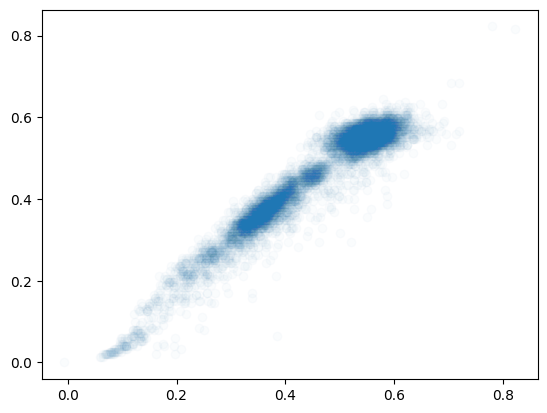

In [57]:
import matplotlib.pyplot as plt
plt.scatter(results[0], results[1], alpha=.02)
plt.show()

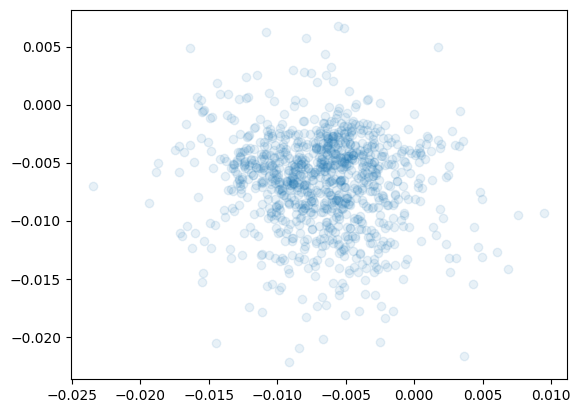

In [58]:
plt.scatter(encodings[:1000, 0], encodings[:1000, 1], alpha=.1)
plt.show()